In [1]:
import pickle as pkl
import os
import seaborn as sns
from matplotlib.colors import ListedColormap
my_cmap = ListedColormap(sns.color_palette("colorblind").as_hex())
path = os.path.join(os.environ['ROADMAP_SCRAPER'], "greyserver", "static", "data", "mturk_final_reduced.pickle")
a = pkl.load(open(path, 'rb'))

In [2]:
da = a.to_dict()
da.keys()

dict_keys(['top_words', 'tfidf', 'embedding', 'dataset', 'model', 'weights', 'multi_choice'])

In [3]:
da['embedding']

{'top_words': {0: [(0.2814950666697298, 'power'),
   (0.2414588962377678, 'system'),
   (0.11754153696260229, 'heat'),
   (0.07225017488814223, 'generation'),
   (0.06429135899845657, 'electricity'),
   (0.057083478661588666, 'chp'),
   (0.05036248076080362, 'energy'),
   (0.04161238301685071, 'electric'),
   (0.03957228287328841, 'district_heating'),
   (0.03433234093076981, 'electrical')],
  1: [(0.3121060241322912, 'fuel'),
   (0.12164852307639636, 'biofuel'),
   (0.11091251351861026, 'ethanol'),
   (0.09049465529456782, 'production'),
   (0.06694511082862518, 'transport'),
   (0.0651519283196546, 'biodiesel'),
   (0.06119950199823692, 'oil'),
   (0.05941016654816914, 'transportation'),
   (0.058594706249226566, 'gasoline'),
   (0.053536870034222174, 'use')],
  2: [(0.32075350703622585, 'market'),
   (0.23533495294416695, 'price'),
   (0.1442558401390668, 'electricity'),
   (0.05035335299567754, 'paper'),
   (0.04654512188923257, 'competition'),
   (0.04290463671478347, 'company'),


In [5]:
from collections import defaultdict

def print_hierarchy(method):
    da["topic_ids"]=[i for j in range(3) for i in range(30)]

    one = defaultdict(lambda: [])
    two = defaultdict(lambda: [])
    three = defaultdict(lambda: [])
    four = defaultdict(lambda: [])

    for i in range(len(da["topic_ids"])):

        labels = [i[0] for i in da[method][i]]
        words = ";;;".join([i[1] for i in da["top_words"][i]])
        dataset = "_".join(da["dataset"][i].split("_")[:2])

        one[labels[0]].append(f'{dataset}_{da["topic_ids"][i]}_{words}')
        two["___".join(labels[:2])].append(f'{dataset}_{da["topic_ids"][i]}_{words}')
        three["___".join(labels[:3])].append(f'{dataset}_{da["topic_ids"][i]}_{words}')
        four["___".join(labels[:4])].append(f'{dataset}_{da["topic_ids"][i]}_{words}')

    for ii, ll in enumerate([one, two, three, four]):
        for k,v in ll.items():
            if len(v)>1:
                print(ii+1, len(v), k)
                for n, t in enumerate(v):
                    print(f'\t{n}\t{t}')
                print()
        
# print_hierarchy("tfidf")

# Auto-labelling: Top-4 distribution

30
20


<Figure size 432x288 with 0 Axes>

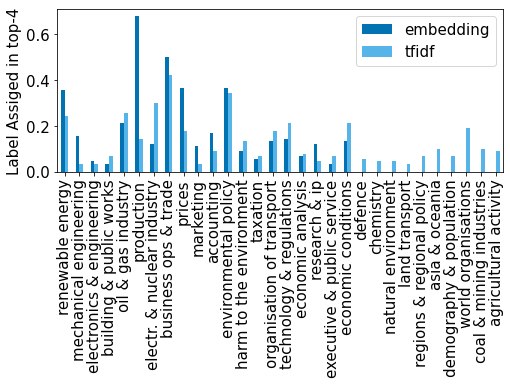

In [7]:
import pandas as pd
import matplotlib.pyplot as plt

fontsize=15

ABBREVIATIONS = {"technology and technical regulations": "technology & regulations",
                 "research and intellectual property": "research & ip",
                 "deterioration of the environment": "harm to the environment",
                 "electrical and nuclear industries": "electr. & nuclear industry",
                 "business operations and trade": "business ops & trade",
                "electronics and electrical engineering": "electronics & engineering",
                "executive power and public service": "executive & public service"}


label_hists = {"embedding":defaultdict(lambda: 0),
               "tfidf":defaultdict(lambda: 0)}


rr=(0,90)
for i in range(rr[0], rr[1]):
    for strategy in ["embedding", "tfidf"]:
        for l in da[strategy][i]:
            label=" ".join(l[0].split(" ")[1:])
            if label in ABBREVIATIONS:
                label = ABBREVIATIONS[label]
            label = label.replace(" and ", " & ")
            label_hists[strategy][label]+=1
#         for l in da["embedding"][i]:

#     for l in da["tfidf"][i]:
#         label_hists["tfidf"][" ".join(l[0].split(" ")[1:])]+=1
keys = set(list(label_hists["tfidf"].keys())+list(label_hists["embedding"].keys()))

for k in keys:
    if k in label_hists["embedding"] and label_hists["embedding"][k]<3:
        del label_hists["embedding"][k]
    if k in label_hists["tfidf"] and label_hists["tfidf"][k]<3:
        del label_hists["tfidf"][k]
print(len(label_hists["tfidf"]))
print(len(label_hists["embedding"]))

# normalize
for k in label_hists.keys():
    for l, v in label_hists[k].items():
        label_hists[k][l]=v/90

fig = plt.figure()
pd.DataFrame(label_hists).plot(kind='bar', 
                               figsize=(8,3), colormap=my_cmap)
plt.ylabel("Label Assiged in top-4", fontsize=fontsize)
plt.xticks(fontsize=fontsize)
plt.yticks(fontsize=fontsize)
plt.legend(loc='upper right', prop={'size': fontsize})

plt.savefig("../figures/questionnaire/label_distribution_top4.png",dpi=300, bbox_inches = "tight")
plt.show()

# Auto-labelling: Top-1 distribution

21
17


<Figure size 432x288 with 0 Axes>

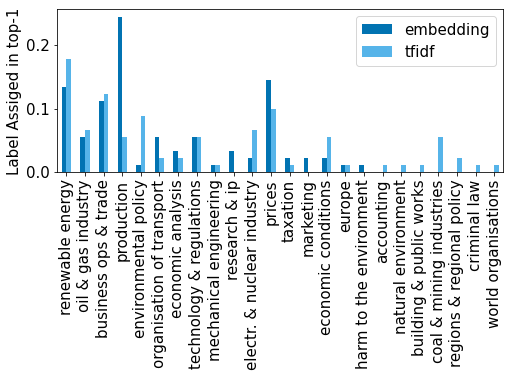

In [8]:
import pandas as pd
import matplotlib.pyplot as plt

fontsize=15


label_hists = {"embedding":defaultdict(lambda: 0),
               "tfidf":defaultdict(lambda: 0)}

rr = (0,90)

for i in range(rr[0], rr[1]):
    for strategy in ["embedding", "tfidf"]:
        label=" ".join(da[strategy][i][0][0].split(" ")[1:])
        if label in ABBREVIATIONS:
            label = ABBREVIATIONS[label]
        label = label.replace(" and ", " & ")
        label_hists[strategy][label]+=1
keys = set(list(label_hists["tfidf"].keys())+list(label_hists["embedding"].keys()))

# for k in keys:
#     if k in label_hists["embeddings"] and label_hists["embeddings"][k]<3:
#         del label_hists["embeddings"][k]
#     if k in label_hists["tfidf"] and label_hists["tfidf"][k]<3:
#         del label_hists["tfidf"][k]
print(len(label_hists["tfidf"]))
print(len(label_hists["embedding"]))

# normalize
for k in label_hists.keys():
    for l, v in label_hists[k].items():
        label_hists[k][l]=v/90


fig = plt.figure()
pd.DataFrame(label_hists).plot(kind='bar', 
                               figsize=(8,3), colormap=my_cmap)
plt.ylabel("Label Assiged in top-1", fontsize=fontsize)
plt.xticks(fontsize=fontsize)
plt.yticks(fontsize=fontsize)
plt.legend(loc='upper right', prop={'size': fontsize})

plt.savefig("../figures/questionnaire/label_distribution_top1.png",dpi=300, bbox_inches = "tight")
plt.show()

# Auto labelling: Top-1 Labels by outlet

/data/greyroads/energy-roadmap/env/lib/python3.8/site-packages/pandas/plotting/_matplotlib/tools.py:331: MatplotlibDeprecationWarning: 
The is_first_col function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use ax.get_subplotspec().is_first_col() instead.
  if ax.is_first_col():


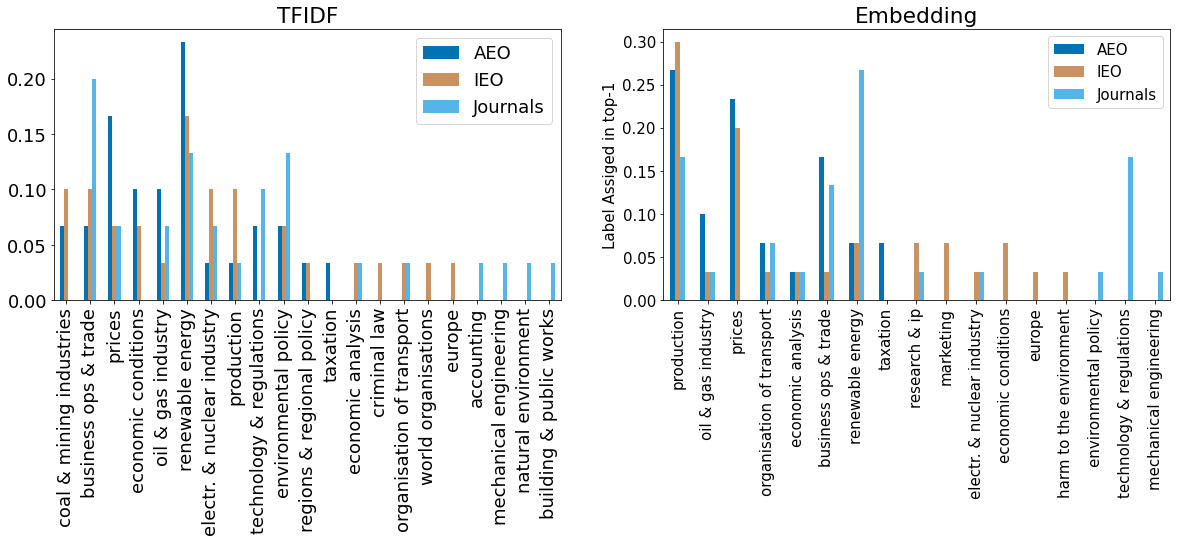

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
palette = sns.color_palette("colorblind", as_cmap=True)

plt.rcParams['font.size'] = '18'

a = a.replace(['greyroads_aeo_min_freq_40_1997_2020_ngram', 
               'greyroads_ieo_min_freq_40_1997_2020_ngram',
               'journal_energy_policy_applied_energy_1997_2020_abstract_all_ngram_min_freq_150'],
               ['AEO', 'IEO', 'Journals'])

plot_dict = a.to_dict()

label_hists = {"tfidf": {"AEO":defaultdict(lambda: 0),
                         "IEO":defaultdict(lambda: 0),
                         "Journals":defaultdict(lambda: 0)},
               "embedding": {"AEO":defaultdict(lambda: 0),
                         "IEO":defaultdict(lambda: 0),
                         "Journals":defaultdict(lambda: 0)}
              }

rr = (0,90)

for strategy in label_hists.keys():
    for i in range(rr[0], rr[1]):
        label=" ".join(plot_dict[strategy][i][0][0].split(" ")[1:])
        outlet=plot_dict["dataset"][i]
        if label in ABBREVIATIONS:
            label = ABBREVIATIONS[label]
        label = label.replace(" and ", " & ")
        label_hists[strategy][outlet][label]+=1

# keys = set(list(label_hists["IEO"].keys())+list(label_hists["AEO"].keys())+list(label_hists["Journals"].keys()))

# normalize
for s in label_hists.keys():
    for k in label_hists[s].keys():
        for l, v in label_hists[s][k].items():
            label_hists[s][k][l]=v/30


fig, axes = plt.subplots(1,2, figsize=(20,5))
pd.DataFrame(label_hists["tfidf"]).plot(ax=axes[0], 
                               kind='bar', title="TFIDF", colormap=my_cmap)

pd.DataFrame(label_hists["embedding"]).plot(ax=axes[1], 
                               kind='bar', title="Embedding", colormap=my_cmap)

plt.ylabel("Label Assiged in top-1", fontsize=fontsize)
plt.xticks(fontsize=fontsize)
plt.yticks(fontsize=fontsize)
plt.legend(loc='upper right', prop={'size': fontsize})

plt.savefig("../figures/questionnaire/per_outlet_distribution_top1.png",dpi=300, bbox_inches = "tight")
plt.show()

# Auto labelling: Top-4 Labels by outlet

/data/greyroads/energy-roadmap/env/lib/python3.8/site-packages/pandas/plotting/_matplotlib/tools.py:331: MatplotlibDeprecationWarning: 
The is_first_col function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use ax.get_subplotspec().is_first_col() instead.
  if ax.is_first_col():


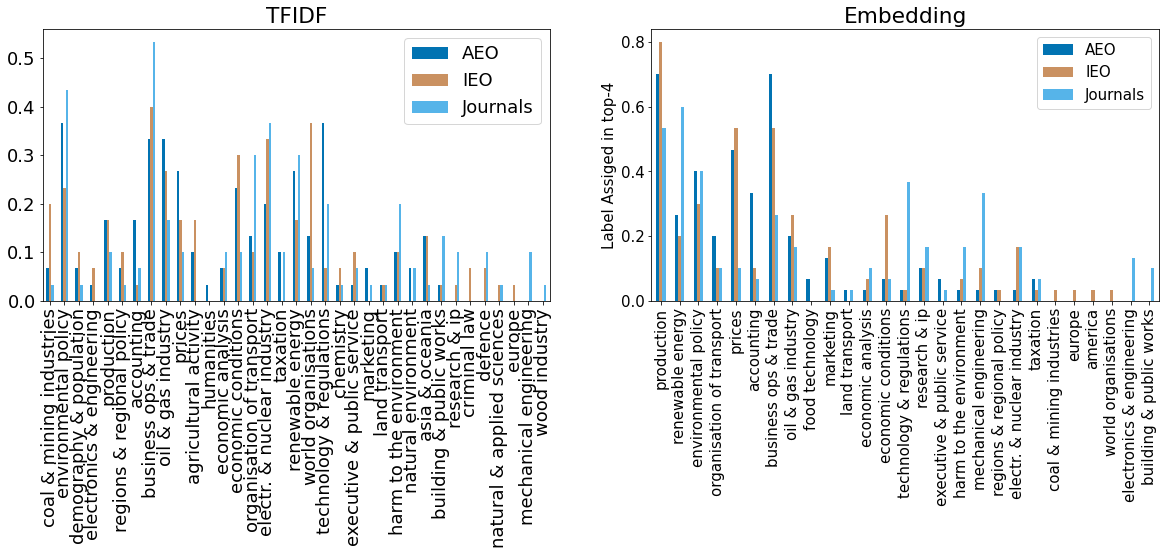

In [7]:
import pandas as pd
import matplotlib.pyplot as plt


plt.rcParams['font.size'] = '18'

a = a.replace(['greyroads_aeo_min_freq_40_1997_2020_ngram', 
               'greyroads_ieo_min_freq_40_1997_2020_ngram',
               'journal_energy_policy_applied_energy_1997_2020_abstract_all_ngram_min_freq_150'],
               ['AEO', 'IEO', 'Journals'])

plot_dict = a.to_dict()

label_hists = {"tfidf": {"AEO":defaultdict(lambda: 0),
                         "IEO":defaultdict(lambda: 0),
                         "Journals":defaultdict(lambda: 0)},
               "embedding": {"AEO":defaultdict(lambda: 0),
                         "IEO":defaultdict(lambda: 0),
                         "Journals":defaultdict(lambda: 0)}
              }

rr = (0,90)

for strategy in label_hists.keys():
    for i in range(rr[0], rr[1]):
#         label=" ".join(plot_dict[strategy][i][0][0].split(" ")[1:])
        outlet=plot_dict["dataset"][i]
        for l in da[strategy][i]:
            label=" ".join(l[0].split(" ")[1:])
            if label in ABBREVIATIONS:
                label = ABBREVIATIONS[label]
            label = label.replace(" and ", " & ")
            label_hists[strategy][outlet][label]+=1

# keys = set(list(label_hists["IEO"].keys())+list(label_hists["AEO"].keys())+list(label_hists["Journals"].keys()))

# normalize
for s in label_hists.keys():
    for k in label_hists[s].keys():
        for l, v in label_hists[s][k].items():
            label_hists[s][k][l]=v/30


fig, axes = plt.subplots(1,2, figsize=(20,5))
pd.DataFrame(label_hists["tfidf"]).plot(ax=axes[0], 
                               kind='bar', title="TFIDF", colormap=my_cmap)

pd.DataFrame(label_hists["embedding"]).plot(ax=axes[1], 
                               kind='bar', title="Embedding", colormap=my_cmap)

plt.ylabel("Label Assiged in top-4", fontsize=fontsize)
plt.xticks(fontsize=fontsize)
plt.yticks(fontsize=fontsize)
plt.legend(loc='upper right', prop={'size': fontsize})

plt.savefig("../figures/questionnaire/per_outlet_distribution_top4.png",dpi=300, bbox_inches = "tight")
plt.show()

# Old stuff, pretty printing

In [105]:
with open('out.txt', 'w+') as of:
    topicIdx=0
    last_data=""
    for i in range(len(da['top_words'])):
        dataset = "_".join(da["dataset"][i].split("_")[:2])
        if dataset != last_data:
            last_data=dataset
            topicIdx=0
        words = [w[1]+" "+str(round(w[0],2)) for w in da['top_words'][i]]
        tfidf = [" ".join(w[0].split(" ")[1:])+" "+str(round(w[1],2)) for w in da['tfidf'][i]]
        embed = [" ".join(w[0].split(" ")[1:])+" "+str(round(w[1],2)) for w in da['embedding'][i]]
        
        of.write(f'{dataset}\t{da["model"][i]}\n') #dataset, model
        of.write(f'k={topicIdx} weight: {round(da["weights"][i], 2)}\n')
        of.write(f'k={topicIdx} terms:\t\t\t{" ; ".join(words)}\n')
        of.write(f'k={topicIdx} label tfidf:\t{" ; ".join(tfidf)}\n')
        of.write(f'k={topicIdx} label embed:\t{" ; ".join(embed)}\n')
        of.write('\n')
        
        topicIdx+=1

In [56]:
with open('out_short.txt', 'w+') as of:
    topicIdx=0
    last_data=""
    for i in range(len(da['top_words'])):
        dataset = "_".join(da["dataset"][i].split("_")[:2])
        if dataset != last_data:
            last_data=dataset
            topicIdx=0
            
        words = [w[1] for w in da['top_words'][i]]
        tfidf = [" ".join(w[0].split(" ")[1:]) for w in da['tfidf'][i]]
        embed = [" ".join(w[0].split(" ")[1:]) for w in da['embedding'][i]]
        
        of.write(f'{"_".join(da["dataset"][i].split("_")[:2])}\n') #dataset, model
        of.write(f'k={topicIdx} weight: {round(da["weights"][i], 2)}\n')
        of.write(f'k={topicIdx} terms:\t\t\t{" ; ".join(words)}\n')
        of.write(f'k={topicIdx} label tfidf:\t{" ; ".join(tfidf)}\n')
        of.write(f'k={topicIdx} label embed:\t{" ; ".join(embed)}\n')
        of.write('\n')
        
        topicIdx+=1

# Does number of terms matter?

In [5]:
import pandas as pd
import sys
sys.path.append(os.path.join(os.environ['ROADMAP_SCRAPER']))
from DTM.dtm.analysis import DTMAnalysis
labels = pd.read_pickle(path)
aeo_analysis = DTMAnalysis(
        2686, 
        30,
        model_root=os.path.join(os.environ['DTM_ROOT'], "dtm", "final_datasets", "greyroads_aeo_min_freq_40_1997_2020_ngram"),
        doc_year_map_file_name="model-year.dat",
        seq_dat_file_name="model-seq.dat",
        vocab_file_name="vocab.txt",
        model_out_dir="k30_a0.01_var0.05",
        eurovoc_whitelist=True,
)
aeo_analysis._init_eurovoc()

Initialising EuroVoc...


In [12]:
aeo_analysis.eurovoc.groupby('MT')['MT'].count().sort_values()

MT
6626 renewable energy                           35
6836 wood industry                              39
6036 food technology                            56
1631 economic analysis                          64
6406 production                                 67
6831 building and public works                  67
6611 coal and mining industries                 70
6826 electronics and electrical engineering     71
4816 land transport                             78
5621 cultivation of agricultural land           86
2036 distributive trades                        86
6621 electrical and nuclear industries          87
6616 oil and gas industry                       88
6821 mechanical engineering                     88
3611 humanities                                 93
4026 accounting                                 96
1616 regions and regional policy                98
6816 iron, steel and other metal industries    101
7216 america                                   117
2451 prices                 